<a href="https://colab.research.google.com/github/GayatriKhandre/Machine-Learning/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

mnist = fetch_openml('mnist_784')

In [ ]:
mnist

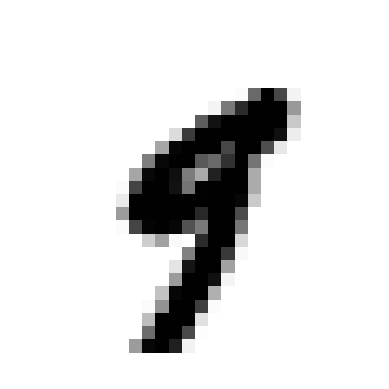

In [5]:

x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()


In [6]:
y[36000]

'9'

In [7]:
x_train , x_test = x[:60000] ,x[60000:]

In [8]:
y_train , y_test = y[:60000] , y[60000:]

In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)

x_train = x_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]

In [10]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train ==2)
y_test_2 = (y_test == 2)

In [ ]:
y_train_2

In [ ]:
y_test_2

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf = LogisticRegression(tol=0.1)

In [ ]:
clf.fit(x_train,y_train_2)

In [ ]:
LogisticRegression(C =  1.0 , class_weight= None, dual=False, fit_intercept = True, intercept_scaling = 1 , l1_ratio = None , max_iter = 100,multi_class='warn',n_jobs = None , penalty = '12',random_state = None , solver = 'warn',tol = 0.1,verbose = 0,warm_start=False )

In [ ]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train,y_train_2, cv =3, scoring ="accuracy")

In [18]:
a.mean()

0.9777999999999999